データの確認

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
train = pd.read_csv('winequality-red.csv')
# test = pd.read_csv('output_test.csv')

# データサイズの確認
print(f'Train shape: {train.shape} ')

# 先頭行の出力
train.head()
# test.head()

Train shape: (1599, 12) 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


統計量の確認

In [2]:
train.describe(include='all')
# test.describe(include='all')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,2.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,2.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,3.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000


相関関係の確認

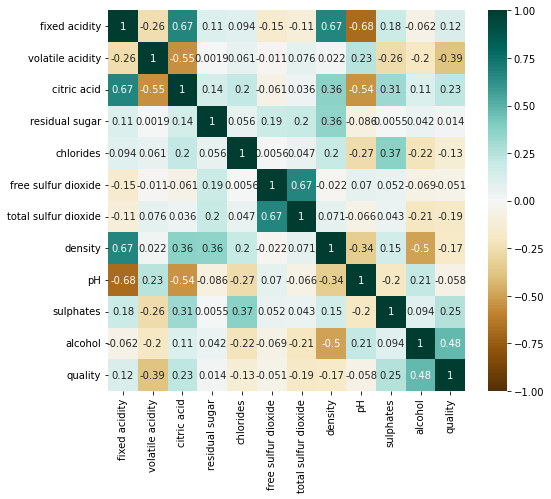

In [3]:
#変数間の相関関係のヒートマップ
fig = plt.figure(figsize=(8,7))
ax = sns.heatmap(train.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1)

# #カテゴリ変数とラベルの関係
# categorical_feature = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
# for feature_name in categorical_feature:
#     fig = plt.figure(figsize=(30,5))
#     plt.xticks(rotation=45, ha="right")
#     ax = sns.countplot(x=feature_name, hue='>50K, <=50K.', data=train)
plt.show()

欠損値とクラスの関係（欠損値がある場合はP.94参照）

In [4]:
print(f'Null of Train: {(train.isnull().sum())}')
# print(f'Null of Test: {(test.isnull().sum())}')

Null of Train: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


前処理

In [5]:

from sklearn.preprocessing import OrdinalEncoder

# # カテゴリカル変数の定義
# categorical_feature = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

# # 特徴量エンジニアリング
# train = train.dropna(subset=['workclass', 'occupation', 'native-country']) #欠損値があるカラムがあれば指定
# test = test.dropna(subset=['workclass', 'occupation', 'native-country']) #欠損値があるカラムがあれば指定

df = pd.concat([train])
oe = OrdinalEncoder()
# df[categorical_feature] = oe.fit_transform(df[categorical_feature]).astype(int)

# df['>50K, <=50K.'] = df['>50K, <=50K.'].replace({' <=50K': 0, ' >50K': 1})
# df['>50K, <=50K.'] = df['>50K, <=50K.'].replace({' <=50K.': 0, ' >50K.': 1})

# データの正規化
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = df.rename(columns={'quality': 'target'})
# Separate the target column and the rest of the columns
df['target'] = pd.factorize(df['target'])[0]
df_target = df['target']
df_without_target = df.drop(columns=['target'])

# Fit and transform the data without the target column
# df_without_target_scaled = pd.DataFrame(scaler.fit_transform(df_without_target), columns = df_without_target.columns)


from sklearn import preprocessing
df_without_target_scaled = pd.DataFrame(preprocessing.scale(df_without_target), columns=df_without_target.columns)

# Combine the target column and the scaled data
df_scaled = pd.concat([df_without_target_scaled, df_target], axis=1)

df_scaled = df_scaled[df_scaled['target'].apply(lambda x: x not in [5, 6])]
df_scaled.to_csv('wine.csv', index=False)
unique_values = df_scaled.nunique()

print(unique_values)
# train = df[df['Survived'].notnull()]#ラベルに欠損値がある場合
# test = df[df['Survived'].notnull()].drop(columns=['Survived'])#ラベルに欠損値がある場合

fixed acidity            96
volatile acidity        141
citric acid              80
residual sugar           89
chlorides               149
free sulfur dioxide      60
total sulfur dioxide    144
density                 433
pH                       89
sulphates                96
alcohol                  64
target                    5
dtype: int64
